In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from collections import Counter

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df = pd.read_csv('../../data/maildata.csv')

In [4]:
print("\nDataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None

First 5 rows:
  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [5]:
print(f"\nMissing values:\n{df.isnull().sum()}")
print(f"Duplicates before: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Duplicates after: {df.duplicated().sum()}")


Missing values:
Category    0
Message     0
dtype: int64
Duplicates before: 415
Duplicates after: 0


/tmp/ipykernel_5076/2711665046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Category', data=df, palette='pastel')


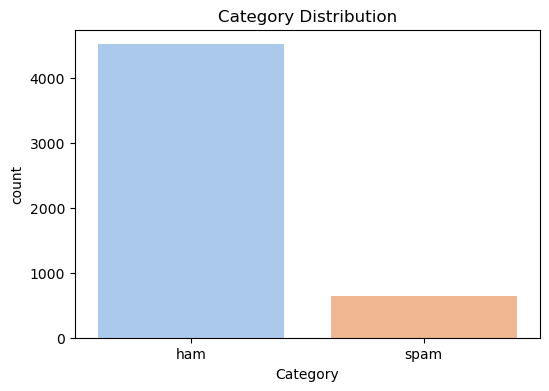

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Category', data=df, palette='pastel')
plt.title("Category Distribution")
plt.show()

In [7]:
print("\nCategory counts:")
print(df['Category'].value_counts())


Category counts:
Category
ham     4516
spam     641
Name: count, dtype: int64


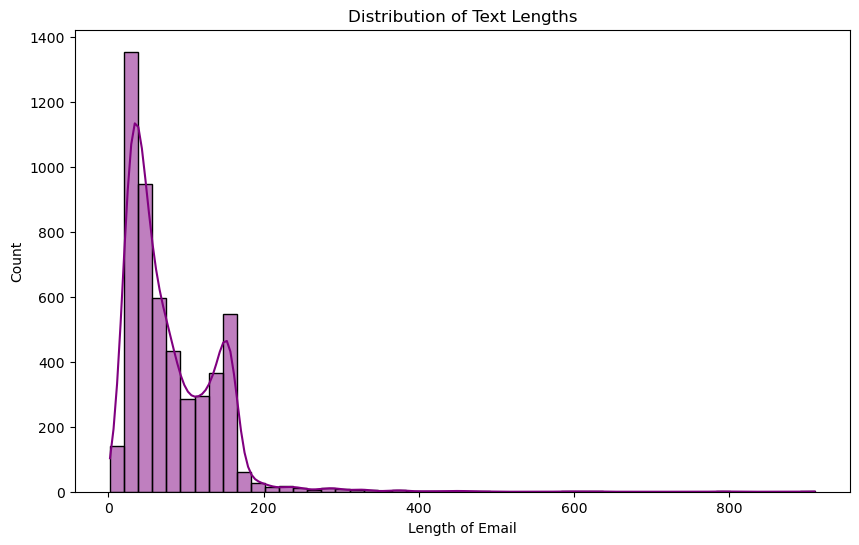

In [8]:
df['text_length'] = df['Message'].apply(len)
plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], kde=True, bins=50, color='purple')
plt.title("Distribution of Text Lengths")
plt.xlabel("Length of Email")
plt.ylabel("Count")
plt.show()

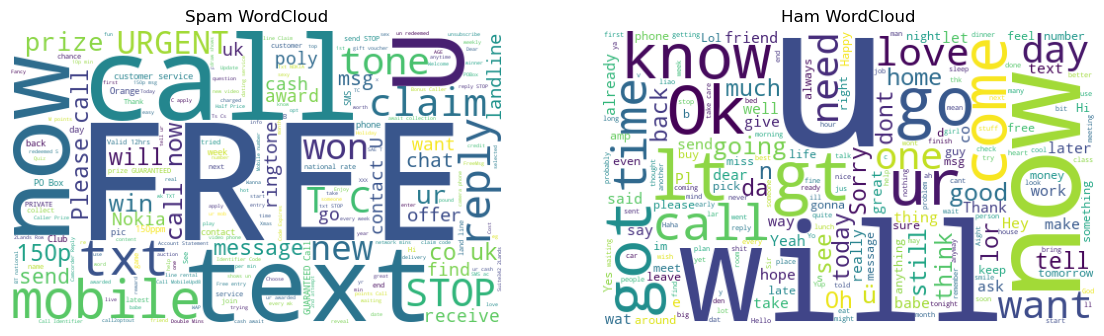

In [9]:
spam_words = ' '.join(df[df['Category'] == 'spam']['Message'])
ham_words = ' '.join(df[df['Category'] == 'ham']['Message'])

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Spam WordCloud")
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(spam_words))
plt.axis('off')

plt.subplot(1,2,2)
plt.title("Ham WordCloud")
plt.imshow(WordCloud(width=500, height=300, background_color='white').generate(ham_words))
plt.axis('off')

plt.show()

In [10]:
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text, use_stemming=True):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)  
    text = re.sub(r'\d+', '', text)  
    text = re.sub(r'[^\x00-\x7f]', r'', text)  
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)  
    words = [w for w in text.split() if w not in stop_words]
    if use_stemming:
        words = [ps.stem(w) for w in words]
    else:
        words = [lemmatizer.lemmatize(w) for w in words]
    return " ".join(words)

df['clean_text'] = df['Message'].apply(lambda x: clean_text(x, use_stemming=False))


/tmp/ipykernel_5076/1228240658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


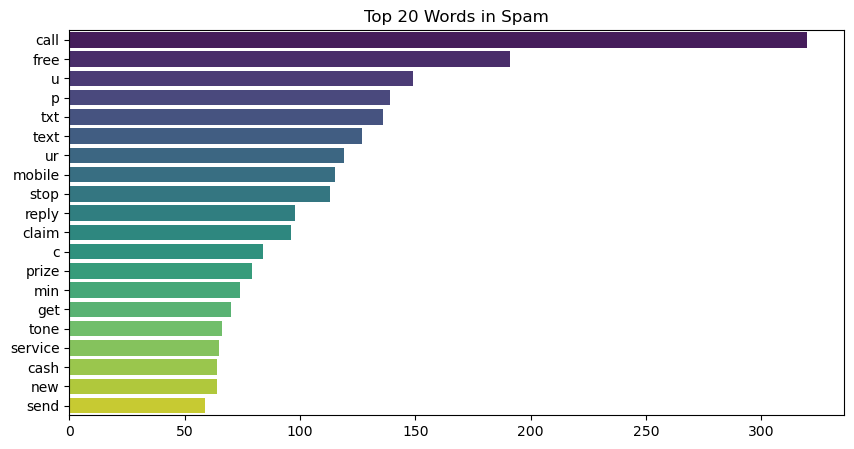

/tmp/ipykernel_5076/1228240658.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="viridis")


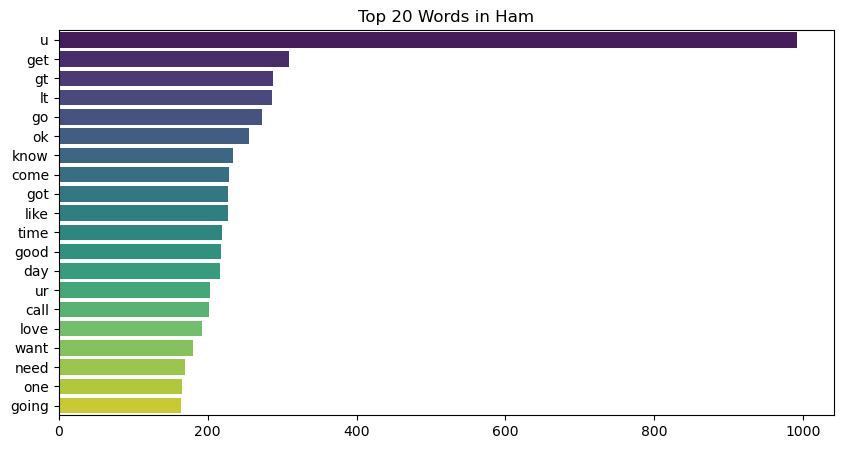

In [11]:
def plot_common_words(texts, title):
    all_words = " ".join(texts).split()
    counter = Counter(all_words)
    common_words = counter.most_common(20)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10,5))
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title)
    plt.show()

plot_common_words(df[df['Category']=="spam"]['clean_text'], "Top 20 Words in Spam")
plot_common_words(df[df['Category']=="ham"]['clean_text'], "Top 20 Words in Ham")

In [15]:
df.to_csv('data/maildata_cleaned.csv', index=False)
print("\nPreprocessing complete. Cleaned dataset saved as 'maildata_cleaned.csv'")


Preprocessing complete. Cleaned dataset saved as 'maildata_cleaned.csv'
